<a href="https://colab.research.google.com/github/spdr-lily/Data-Science-Profile/blob/main/pratica_com_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# lendo o arquivo CSV
file_path = '/content/familia.csv'
df = pd.read_csv(file_path)

In [42]:
print(df.columns)

Index(['Nome', 'Segundo Nome', 'Idade', 'Profissão', 'Escolaridade',
       'Local de Nascimento', 'Salário'],
      dtype='object')


In [43]:
# agrupando os salários por profissão e cauculando a média
salarios_por_profissao = df.groupby('Profissão')['Salário'].mean()

In [44]:
# ordenando em ordem decrescente de salário médio
salarios_por_profissao = salarios_por_profissao.sort_values(ascending=False)

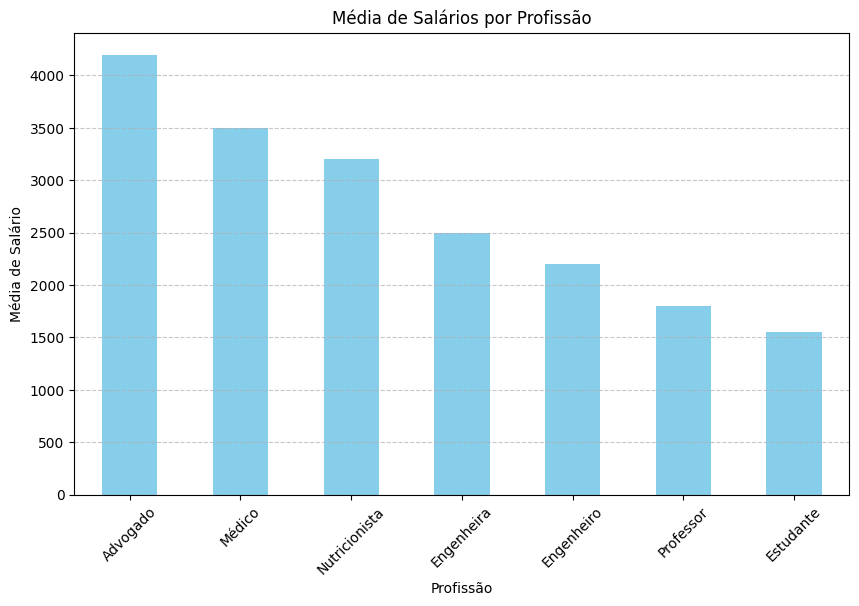

In [45]:
# criando gráfico de barras
plt.figure(figsize=(10, 6))
salarios_por_profissao.plot(kind='bar', color='skyblue')
plt.title('Média de Salários por Profissão')
plt.xlabel('Profissão')
plt.ylabel('Média de Salário')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Estatística Descritiva

In [46]:
# usando pandas e numpy para calcular estatísticas descritivas dos salários dafamília, como média, mediana, desvio padrão, mínimo e máximo
media_salarial = np.mean(df['Salário'])
mediana_salarial = np.median(df['Salário'])
desvio_padrao_salarial = np.std(df['Salário'])
salario_minimo = np.min(df['Salário'])
salario_maximo = np.max(df['Salário'])

print(f'Média salarial: R${media_salarial:.2f}')
print(f'Mediana salarial: R${mediana_salarial:.2f}')
print(f'Desvio padrão salarial: R${desvio_padrao_salarial:.2f}')
print(f'Salário mínimo: R${salario_minimo:.2f}')
print(f'Salário máximo: R${salario_maximo:.2f}')

Média salarial: R$2562.50
Mediana salarial: R$2350.00
Desvio padrão salarial: R$933.99
Salário mínimo: R$1200.00
Salário máximo: R$4200.00


# Análise de Distribuição de Salários

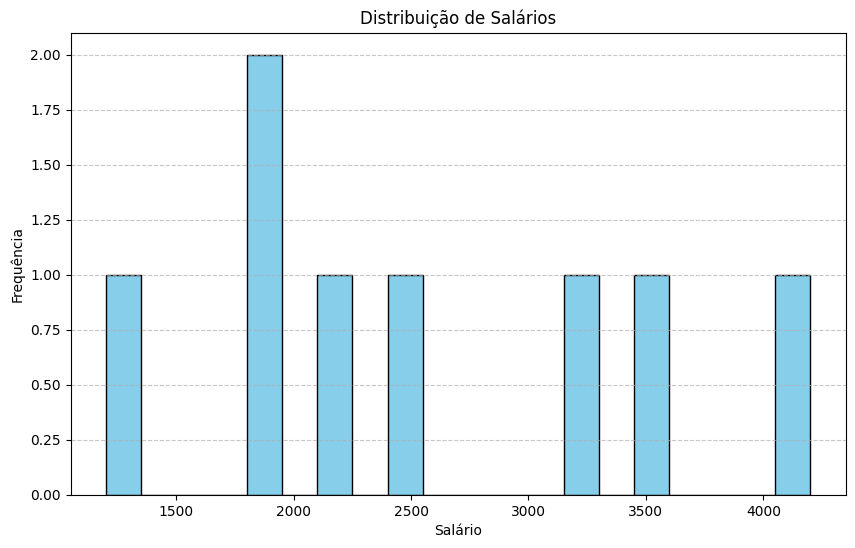

In [64]:
# utilizando matplotlib para criar um histograma para vizualizar a distribuição dos salários da família e verificar se eles seguem uma distribuição normal ou se há alguma tendência específica
plt.figure(figsize=(10, 6))
plt.hist(df['Salário'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição de Salários')
plt.xlabel('Salário')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Comparação de Salários por Escolaridade

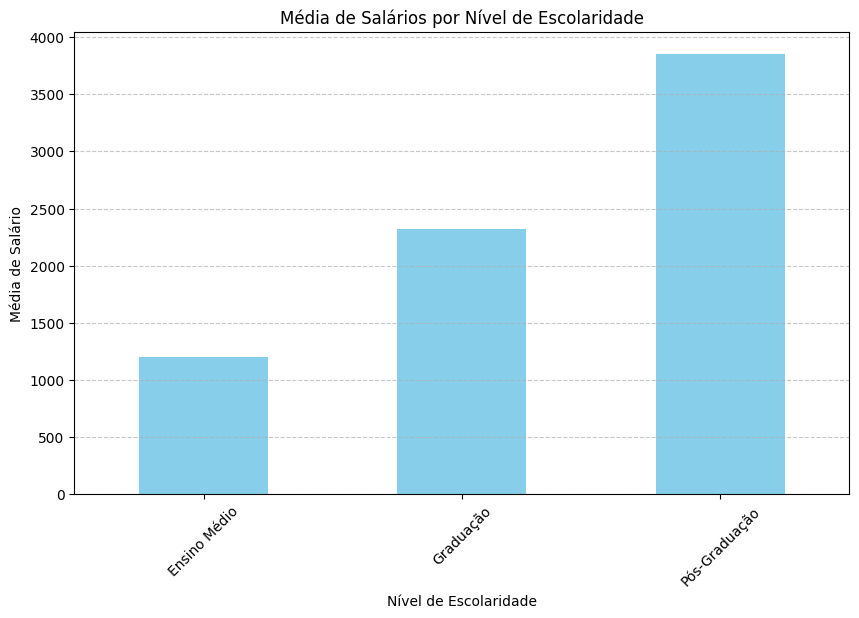

In [48]:
# comparando os salários médios por nível de escolaridade, mostrando um gráfico de barras
media_salarial_por_escolaridade = df.groupby('Escolaridade')['Salário'].mean()

plt.figure(figsize=(10, 6))
media_salarial_por_escolaridade.plot(kind='bar', color='skyblue')
plt.title('Média de Salários por Nível de Escolaridade')
plt.xlabel('Nível de Escolaridade')
plt.ylabel('Média de Salário')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Análise de Correlação

In [49]:
# calculando a correlação entre a idade e o salário
correlacao_idade_salario = df['Idade'].corr(df['Salário'])
print(f'Correlação entre Idade e Salário: {correlacao_idade_salario:.2f}')

# verificando se há alguma relação
if correlacao_idade_salario > 0:
    print('Há uma correlação positiva entre a idade e o salário.')
elif correlacao_idade_salario < 0:
    print('Há uma correlação negativa entre a idade e o salário.')

Correlação entre Idade e Salário: 0.99
Há uma correlação positiva entre a idade e o salário.


# Análise Geográfica

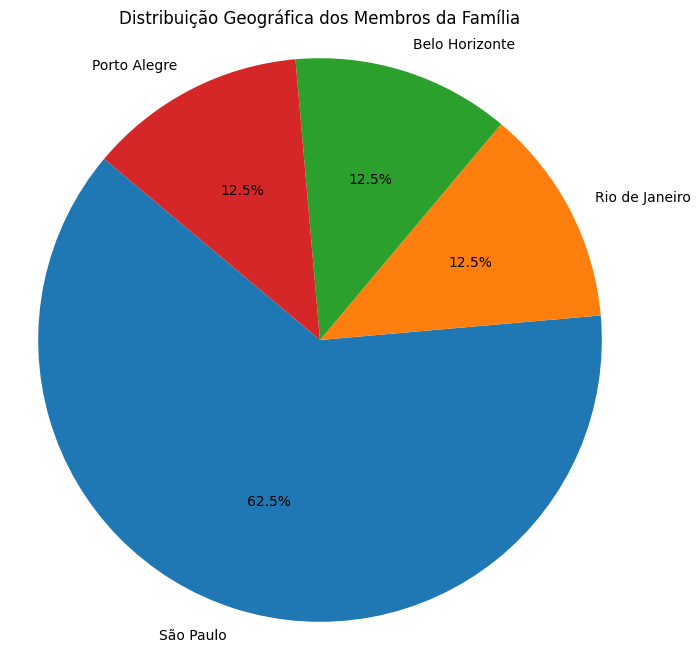

In [50]:
# criando um gráfico de pizza mostrando a distribuição geográfica dos membros da família com base em seu local de nascimento
contagem_local_nascimento = df['Local de Nascimento'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(contagem_local_nascimento, labels=contagem_local_nascimento
        .index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição Geográfica dos Membros da Família')
plt.axis('equal')
plt.show()

# Análise de Profissões

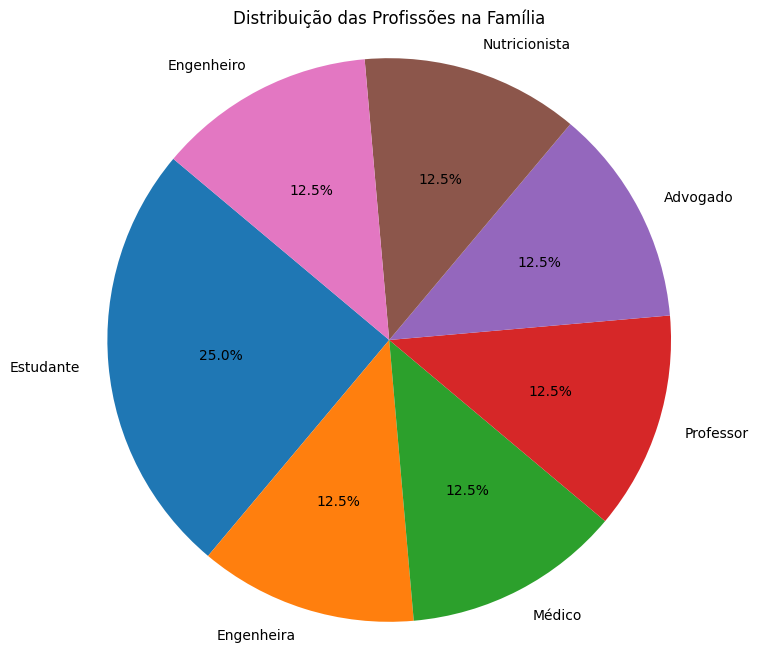

In [51]:
# analisando a distribuição das profissões na família em um gráfico de pizza
contagem_profissoes = df['Profissão'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(contagem_profissoes, labels=contagem_profissoes.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição das Profissões na Família')
plt.axis('equal')
plt.show()

# Análise de Salários por Segundo Nome

In [52]:
# agrupando os salários por segundo nome
salarios_por_segundo_nome = df.groupby('Segundo Nome')['Salário'].mean()

# verificando se há alguma relação
salarios_por_segundo_nome = salarios_por_segundo_nome.sort_values(ascending=False)

# mostrando os resultados
print(salarios_por_segundo_nome)

Segundo Nome
Ribeiro     4200.0
 Silva      3500.0
Martins     3200.0
 Santos     2500.0
Almeida     2200.0
Ferreira    1900.0
 Souza      1800.0
Name: Salário, dtype: float64


# Análise de Outliers

Outliers:
Empty DataFrame
Columns: [Nome, Segundo Nome, Idade, Profissão, Escolaridade, Local de Nascimento, Salário, Escolaridade_encoded, Escolaridade_Numerica]
Index: []


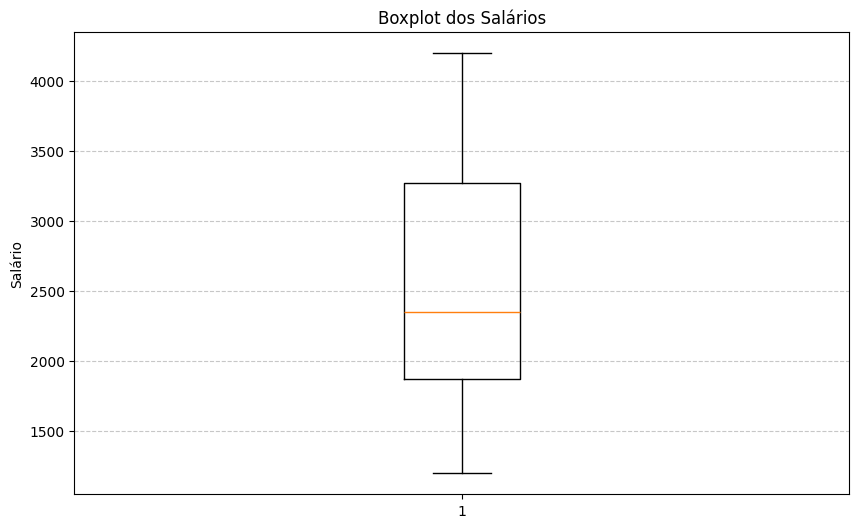

In [62]:
# identificando ouliers
Q1 = df['Salário'].quantile(0.25)
Q3 = df['Salário'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df['Salário'] < limite_inferior) | (df['Salário'] > limite_superior)]
print("Outliers:")
print(outliers)

# visualização em gráfico
plt.figure(figsize=(10, 6))
plt.boxplot(df['Salário'])
plt.title('Boxplot dos Salários')
plt.ylabel('Salário')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Análise de Correlação entre Escolaridade e Salário

Correlação entre Escolaridade e Salário: 0.88


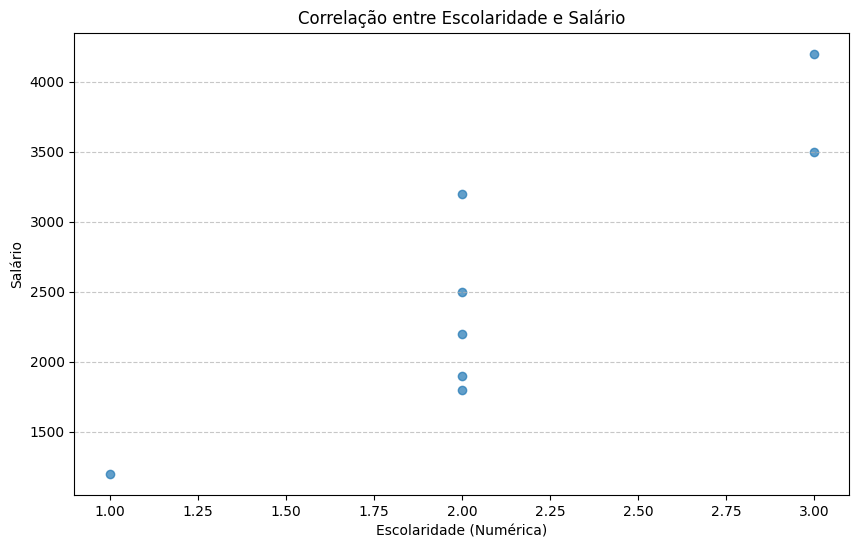

In [60]:
# verificando se existe alguma correlação entre a escolaridade e o salario dos membros da familis com pandas

# Convertendo 'Escolaridade' para representação numérica
mapping = {'Ensino Médio': 1, 'Graduação': 2, 'Pós-Graduação': 3}
df['Escolaridade_Numerica'] = df['Escolaridade'].map(mapping)

# calculando a correlação entre a coluna 'Escolaridade_Numerica' e a coluna 'Salário' usando a função corr()
correlacao = df['Escolaridade_Numerica'].corr(df['Salário'])

print(f'Correlação entre Escolaridade e Salário: {correlacao:.2f}')

# mostrando em um gráfico
plt.figure(figsize=(10, 6))
plt.scatter(df['Escolaridade_Numerica'], df['Salário'], alpha=0.7)
plt.title('Correlação entre Escolaridade e Salário')
plt.xlabel('Escolaridade (Numérica)')
plt.ylabel('Salário')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

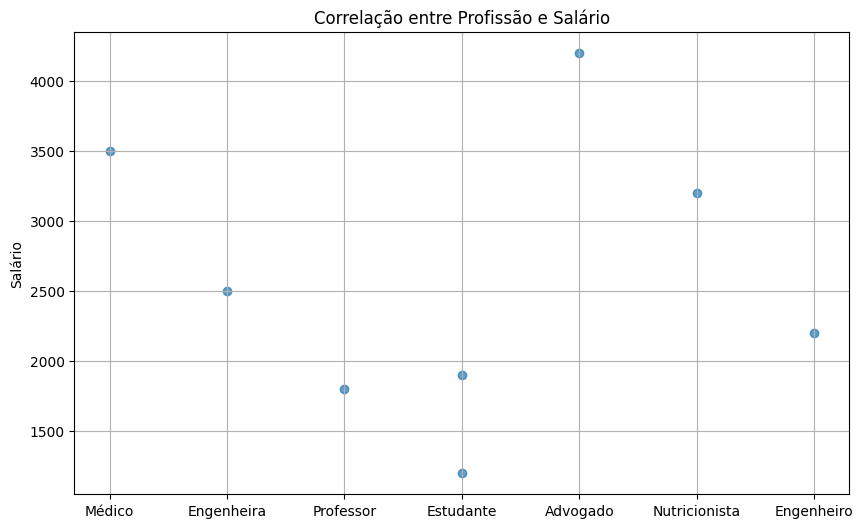

In [65]:
# gráfico salários x profissão
plt.figure(figsize=(10, 6))
plt.scatter(df['Profissão'], df['Salário'], alpha=0.7)
plt.title('Correlação entre Profissão e Salário')
plt.xlabel
plt.ylabel('Salário')
plt.grid(True)
plt.show()

In [66]:
# informando a quantidade de estudantes na família
quantidade_estudantes = len(df)
print(f'Quantidade de estudantes na família: {quantidade_estudantes}')

Quantidade de estudantes na família: 8


In [70]:
# exibindo todos os dados do csv
print(df)

      Nome Segundo Nome  Idade      Profissão   Escolaridade  \
0     João        Silva     45         Médico  Pós-Graduação   
1    Maria       Santos     32     Engenheira      Graduação   
2    Pedro        Souza     28      Professor      Graduação   
3      Ana          NaN     19      Estudante   Ensino Médio   
4   Carlos      Ribeiro     56       Advogado  Pós-Graduação   
5    Laura      Martins     42  Nutricionista      Graduação   
6     Luiz      Almeida     30     Engenheiro      Graduação   
7  Beatriz     Ferreira     24      Estudante      Graduação   

  Local de Nascimento  Salário  
0           São Paulo     3500  
1      Rio de Janeiro     2500  
2           São Paulo     1800  
3      Belo Horizonte     1200  
4        Porto Alegre     4200  
5           São Paulo     3200  
6           São Paulo     2200  
7           São Paulo     1900  


In [71]:
# informando a quantidade de estudantes de ensino médio que a família possui
estudantes_ensino_medio = len(df[df['Escolaridade'] == 'Ensino Médio'])
print(f'Quantidade de estudantes de ensino médio na família: {estudantes_ensino_medio}')

Quantidade de estudantes de ensino médio na família: 1


In [72]:
# informando a quantidade de membros que não são de São Paulo
nao_sao_sao_paulo = len(df[df['Local de Nascimento'] != 'São Paulo'])
print(f'Quantidade de membros que não são de São Paulo: {nao_sao_sao_paulo}')

Quantidade de membros que não são de São Paulo: 3
